In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
ds = xr.open_mfdataset('/Volumes/UnionSine/fco2/fco2_no_alk/*.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
ds_oae = xr.open_mfdataset('/Volumes/UnionSine/fco2/fco2_alk/*.nc')

### EU Seasonal Average of FCO2 from 2015 to 2100 with and without OAE

In [7]:
sliced_data_baseline = ds.where((-25 < ds.nav_lon) & (ds.nav_lon < 10) & (35 < ds.nav_lat) & (ds.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [8]:
sliced_data_oae = ds_oae.where((-25 < ds_oae.nav_lon) & (ds_oae.nav_lon < 10) & (35 < ds_oae.nav_lat) & (ds_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [9]:
sliced_data_baseline_plot = sliced_data_baseline.fco2.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.fco2.mean(dim=('y', 'x'))

In [10]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

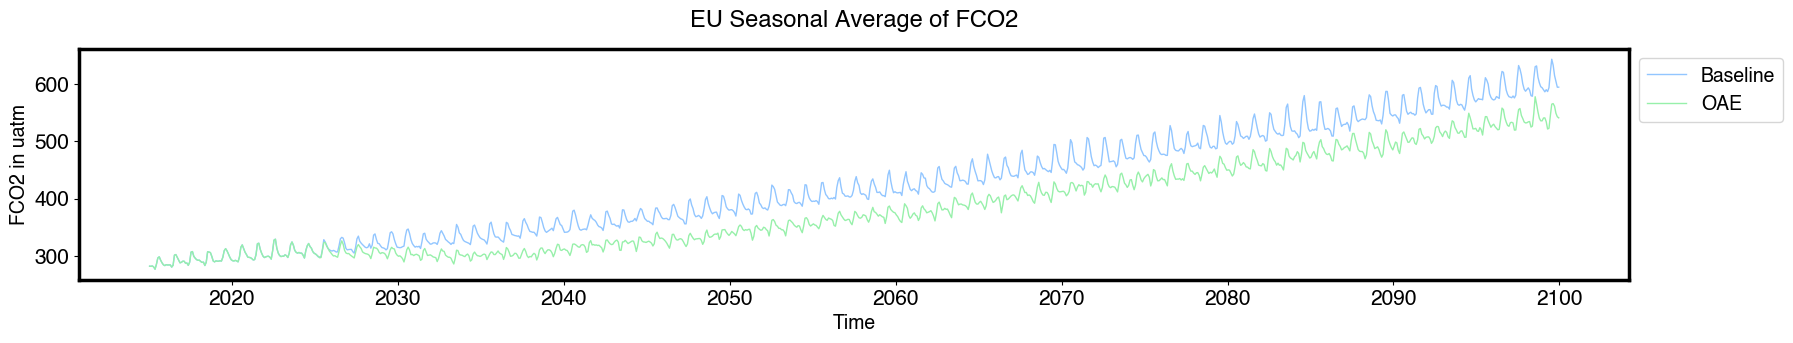

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.fco2, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.fco2, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of FCO2', fontsize=17, y=1.06)
plt.show()

### EU Seasonal Average of FCO2 from 2090 to 2100 with and without OAE

In [12]:
sliced_frame_baseline_plot = sliced_frame_baseline.fco2.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.fco2.mean(dim=('y', 'x'))

In [13]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

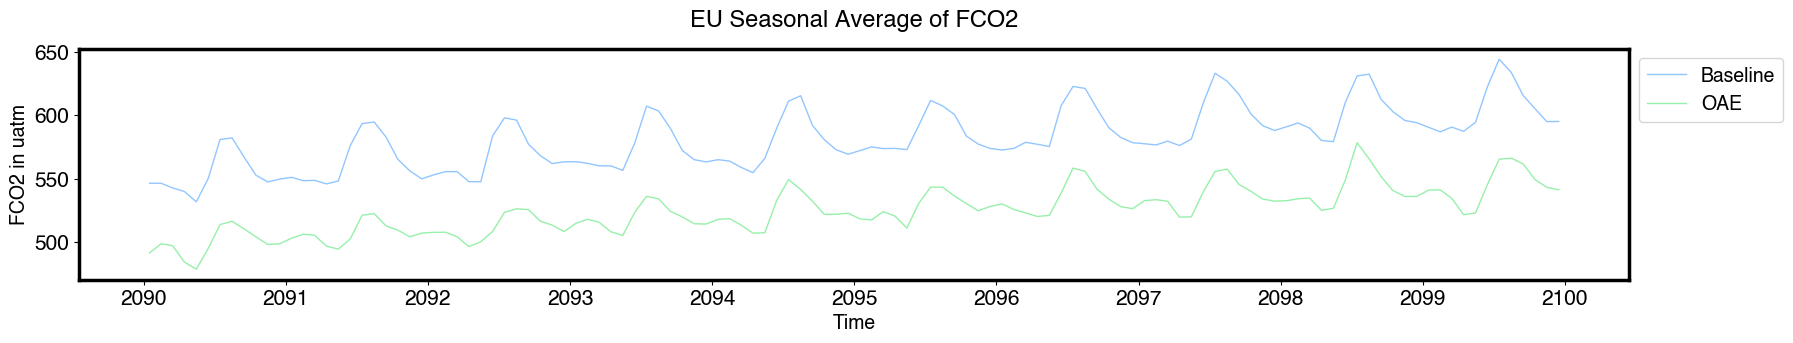

In [14]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.fco2, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.fco2, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of FCO2', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of FCO2 from 2090 to 2100 with and without OAE

In [15]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_baseline = sliced_data_baseline["fco2"].sel(time_counter=slice(start_date, end_date))

In [16]:
fco2_season_summary_baseline = fco2_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_season_mean_all_years_baseline = fco2_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
fco2_seasonal_mean_baseline = fco2_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning:

Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.



In [17]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_oae = sliced_data_oae["fco2"].sel(time_counter=slice(start_date, end_date))

In [18]:
fco2_season_summary_oae = fco2_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_season_mean_all_years_oae = fco2_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
fco2_seasonal_mean_oae = fco2_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning:

Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.



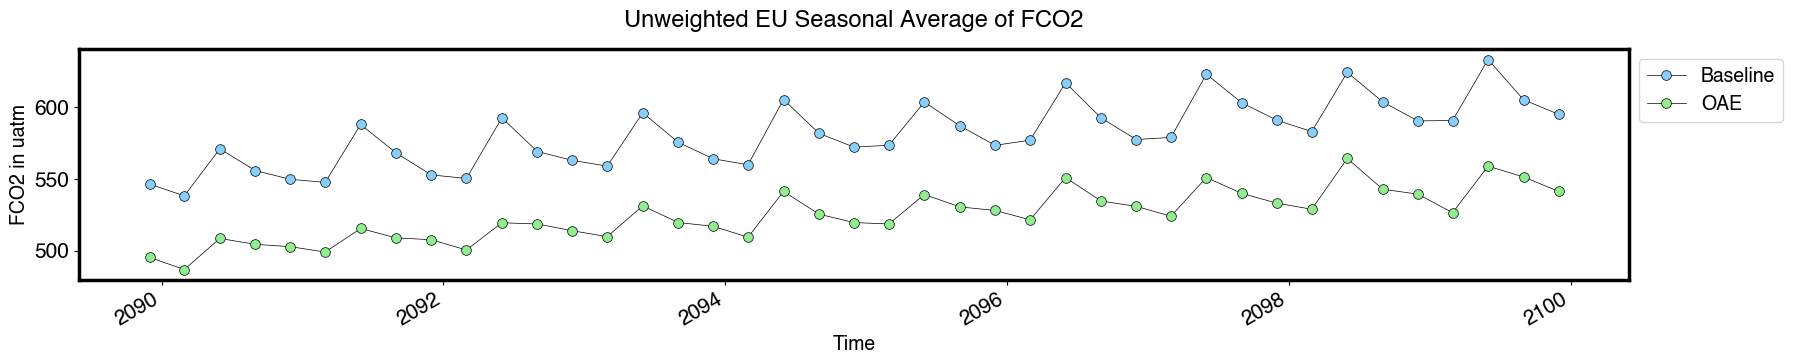

In [19]:
f, ax = plt.subplots(figsize=(20, 3))
fco2_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black",
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of FCO2 from 2090 to 2100 with and without OAE

In [20]:
# weighted mean without OAE

month_length_baseline = fco2_baseline.time_counter.dt.days_in_month
fco2_weighted_mean_baseline = ((fco2_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
fco2_weighted_mean_baseline = fco2_weighted_mean_baseline.where(fco2_weighted_mean_baseline)
fco2_weighted_season_baseline = fco2_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [21]:
# weighted mean with OAE

month_length_oae = fco2_oae.time_counter.dt.days_in_month
fco2_weighted_mean_oae = ((fco2_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
fco2_weighted_mean_oae = fco2_weighted_mean_oae.where(fco2_weighted_mean_oae)
fco2_weighted_season_oae = fco2_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

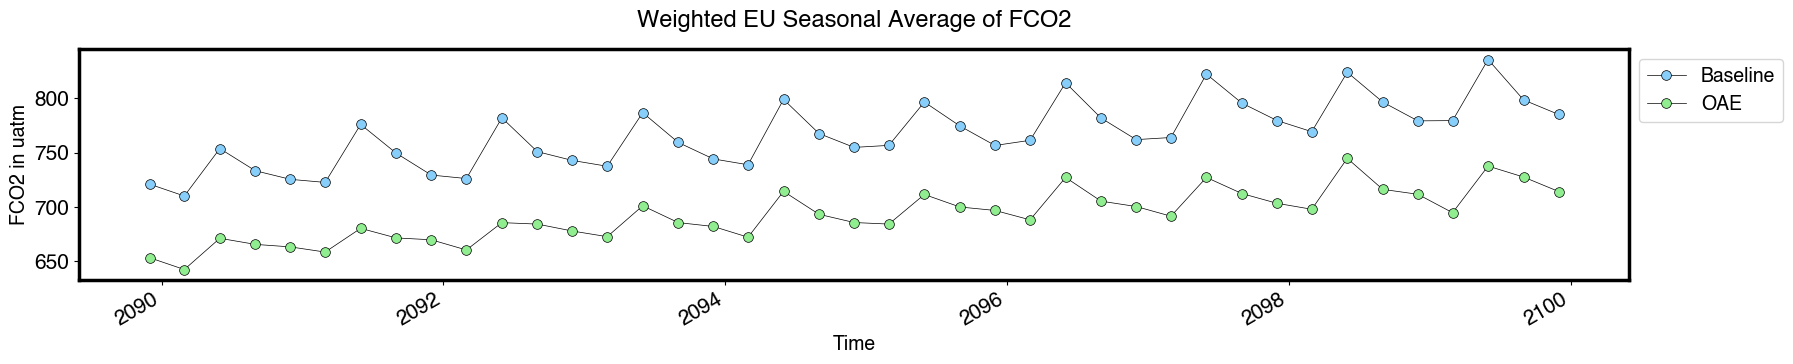

In [22]:
f, ax = plt.subplots(figsize=(20, 3))
fco2_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black",
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of FCO2 from 2090 to 2100 with and without OAE

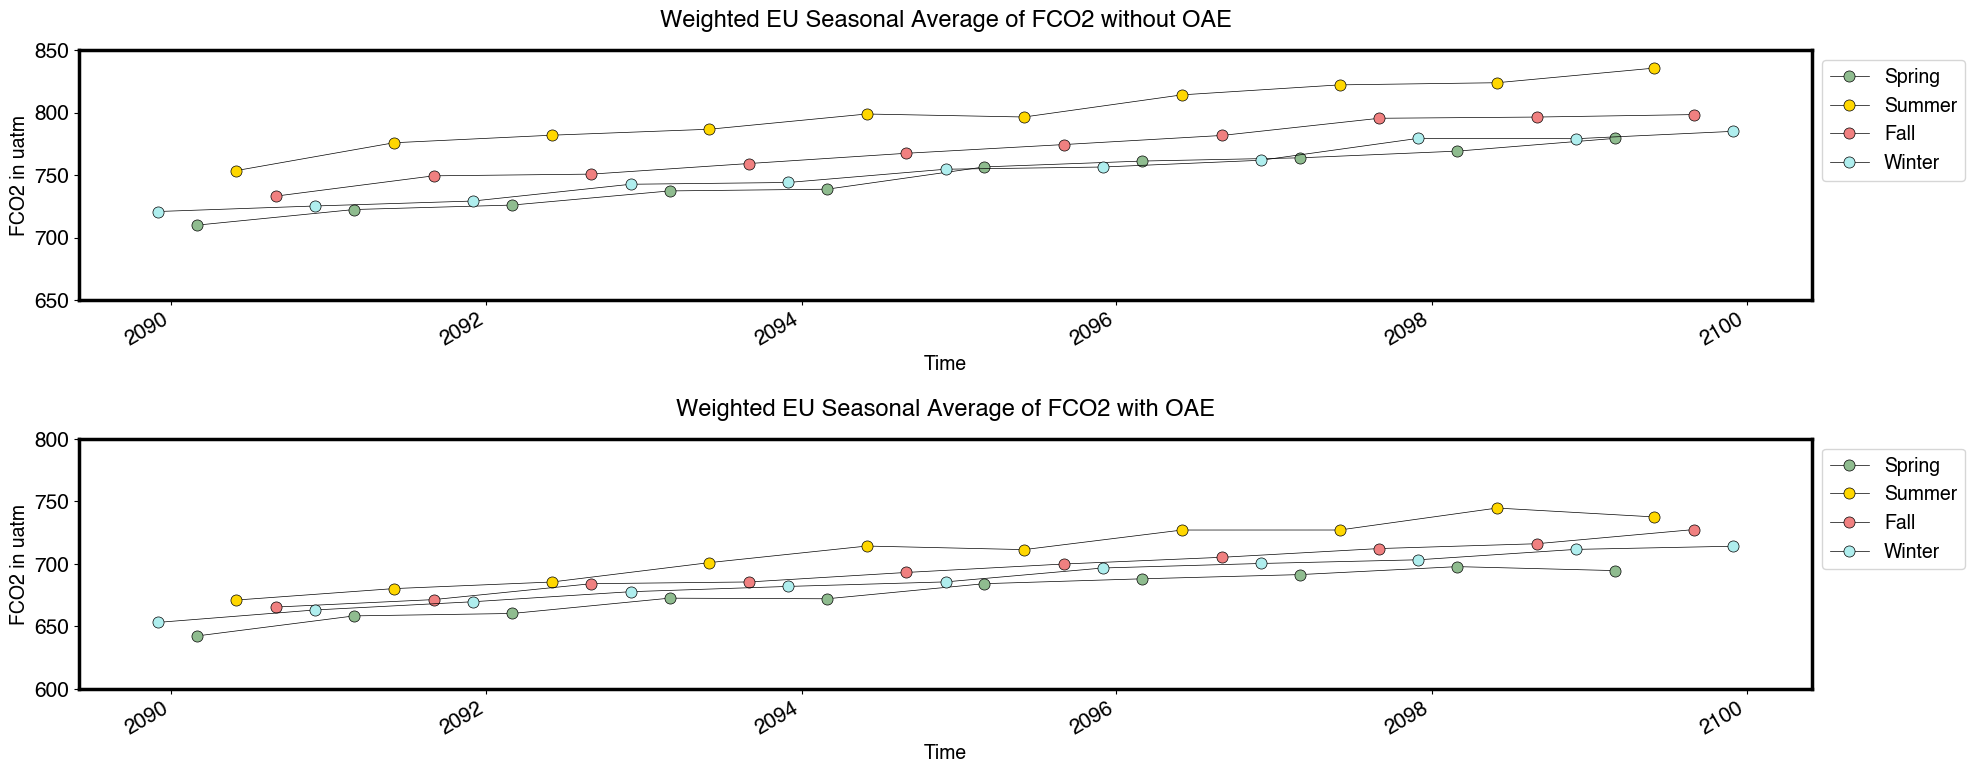

In [23]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in fco2_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.set_ylim(650, 850)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('FCO2 in uatm', fontsize=14)

for month, arr in fco2_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set_ylim(600, 800)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('FCO2 in uatm', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of FCO2 from 2090 to 2100 without OAE

In [24]:
fco2_weighted_baseline = fco2_weighted_season_baseline.to_dataframe('fco2')
fco2_weighted_baseline['Month'] = pd.DatetimeIndex(fco2_weighted_baseline.index).month

In [25]:
conditions = [
    (fco2_weighted_baseline['Month'] == 3),
    (fco2_weighted_baseline['Month'] == 6),
    (fco2_weighted_baseline['Month'] == 9),
    (fco2_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

fco2_weighted_baseline['Month'] = np.select(conditions, values)

In [26]:
colors = dict(zip(fco2_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

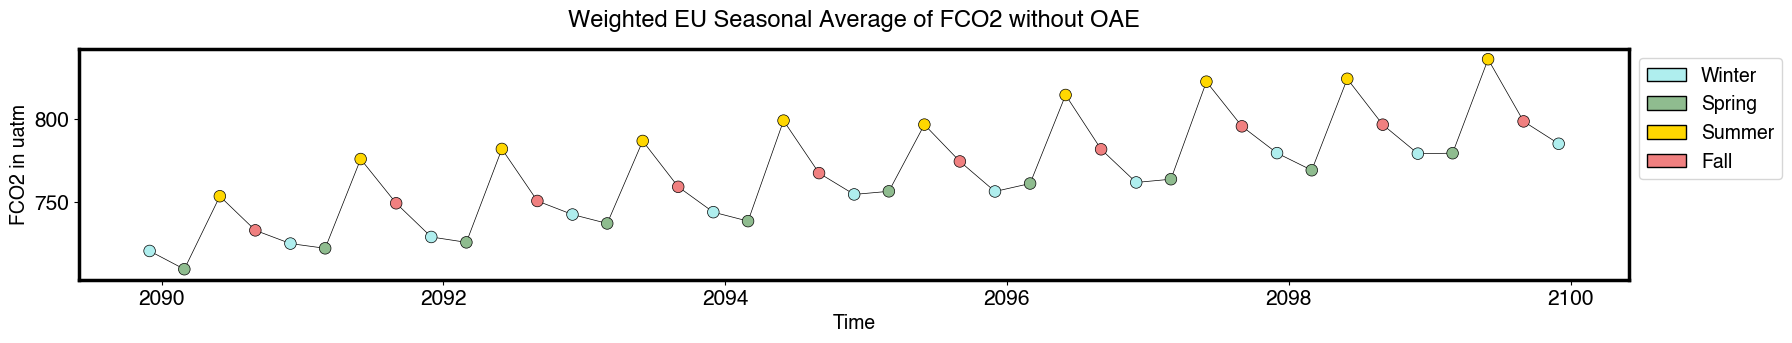

In [27]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, color=fco2_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of FCO2 from 2090 to 2100 with OAE

In [28]:
fco2_weighted_oae = fco2_weighted_season_oae.to_dataframe('fco2')
fco2_weighted_oae['Month'] = pd.DatetimeIndex(fco2_weighted_oae.index).month

In [29]:
conditions = [
    (fco2_weighted_oae['Month'] == 3),
    (fco2_weighted_oae['Month'] == 6),
    (fco2_weighted_oae['Month'] == 9),
    (fco2_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

fco2_weighted_oae['Month'] = np.select(conditions, values)

In [30]:
colors = dict(zip(fco2_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

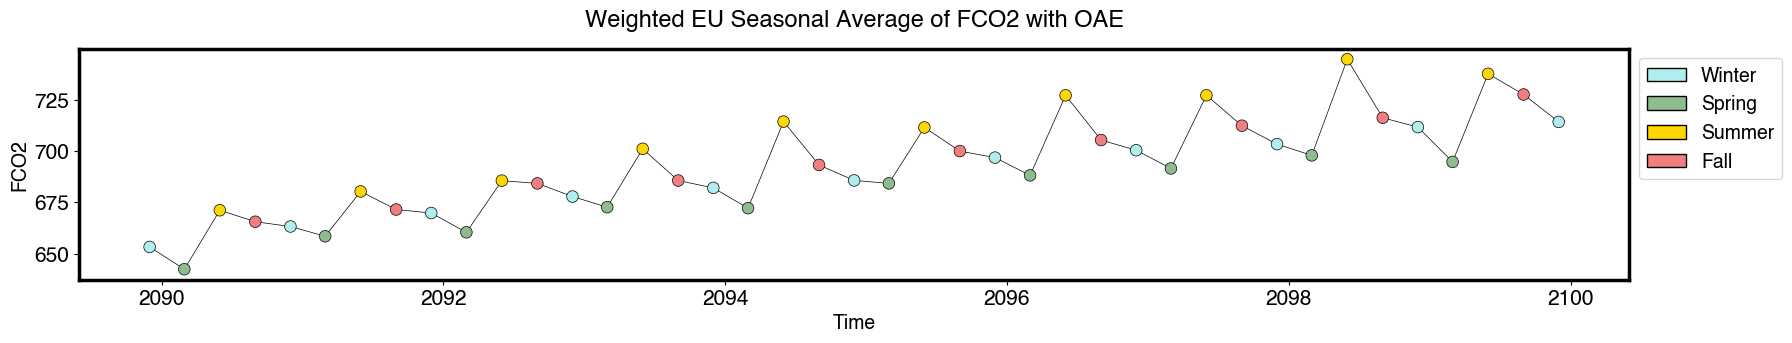

In [31]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_weighted_oae.index, fco2_weighted_oae.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_oae.index, fco2_weighted_oae.fco2, color=fco2_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of FCO2 from 2090 to 2100 with and without OAE 

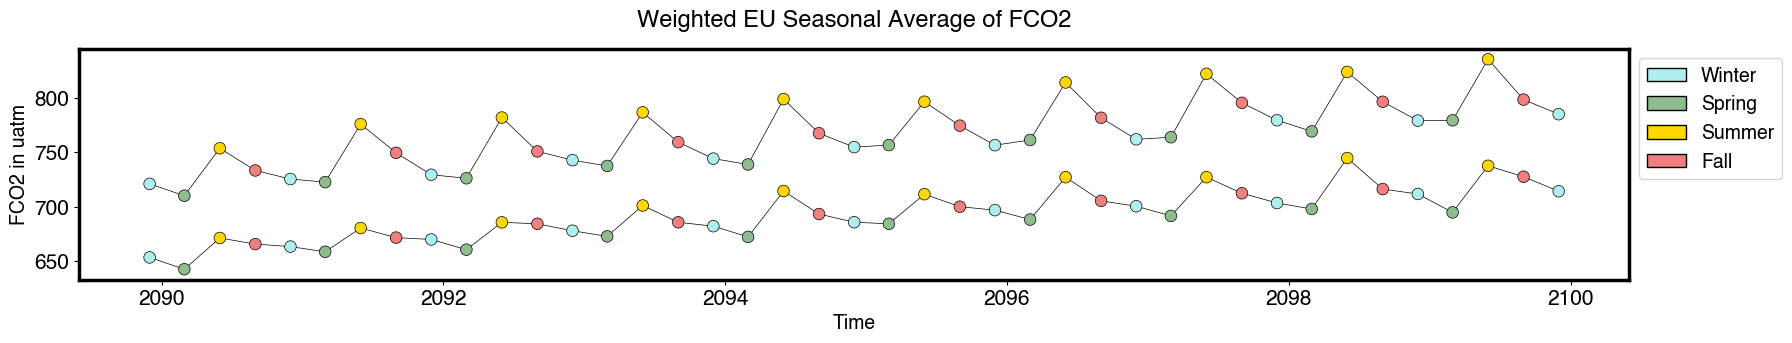

In [32]:
colors = dict(zip(fco2_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, color=fco2_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(fco2_weighted_oae.index, fco2_weighted_oae.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_oae.index, fco2_weighted_oae.fco2, color=fco2_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend,  bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Averaged FCO2 for the last 10 years with and without OAE

In [33]:
mean_baseline = (sliced_frame_baseline.fco2.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).fco2.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [34]:
mean_oae = (sliced_frame_oae.fco2.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).fco2.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

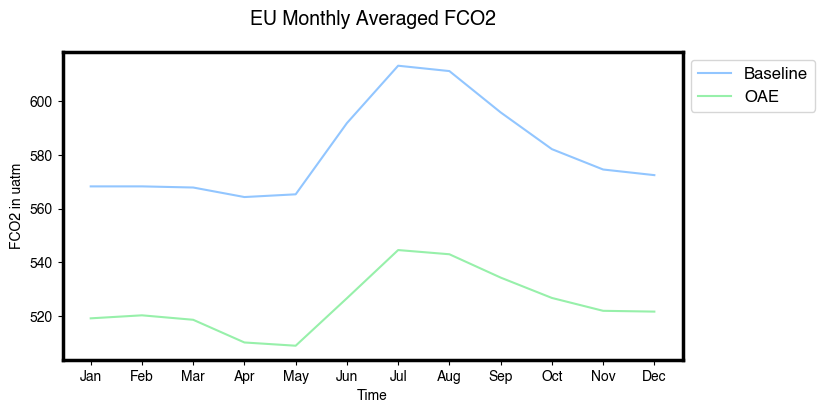

In [35]:
plt.figure(figsize=(8,4))
plt.plot(mean_baseline.fco2, label='Baseline')
plt.plot(mean_oae.fco2, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10, fontname="Helvetica")
plt.ylabel("FCO2 in uatm", fontsize=10, fontname="Helvetica")
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Monthly Averaged FCO2', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### EU Seasonal Average of FCO2 from 2090 to 2100 without OAE

In [36]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [37]:
weights_baseline = weights_baseline.to_dataset()

In [38]:
ds_weighted_baseline = (sliced_frame_baseline.fco2 * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='fco2')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

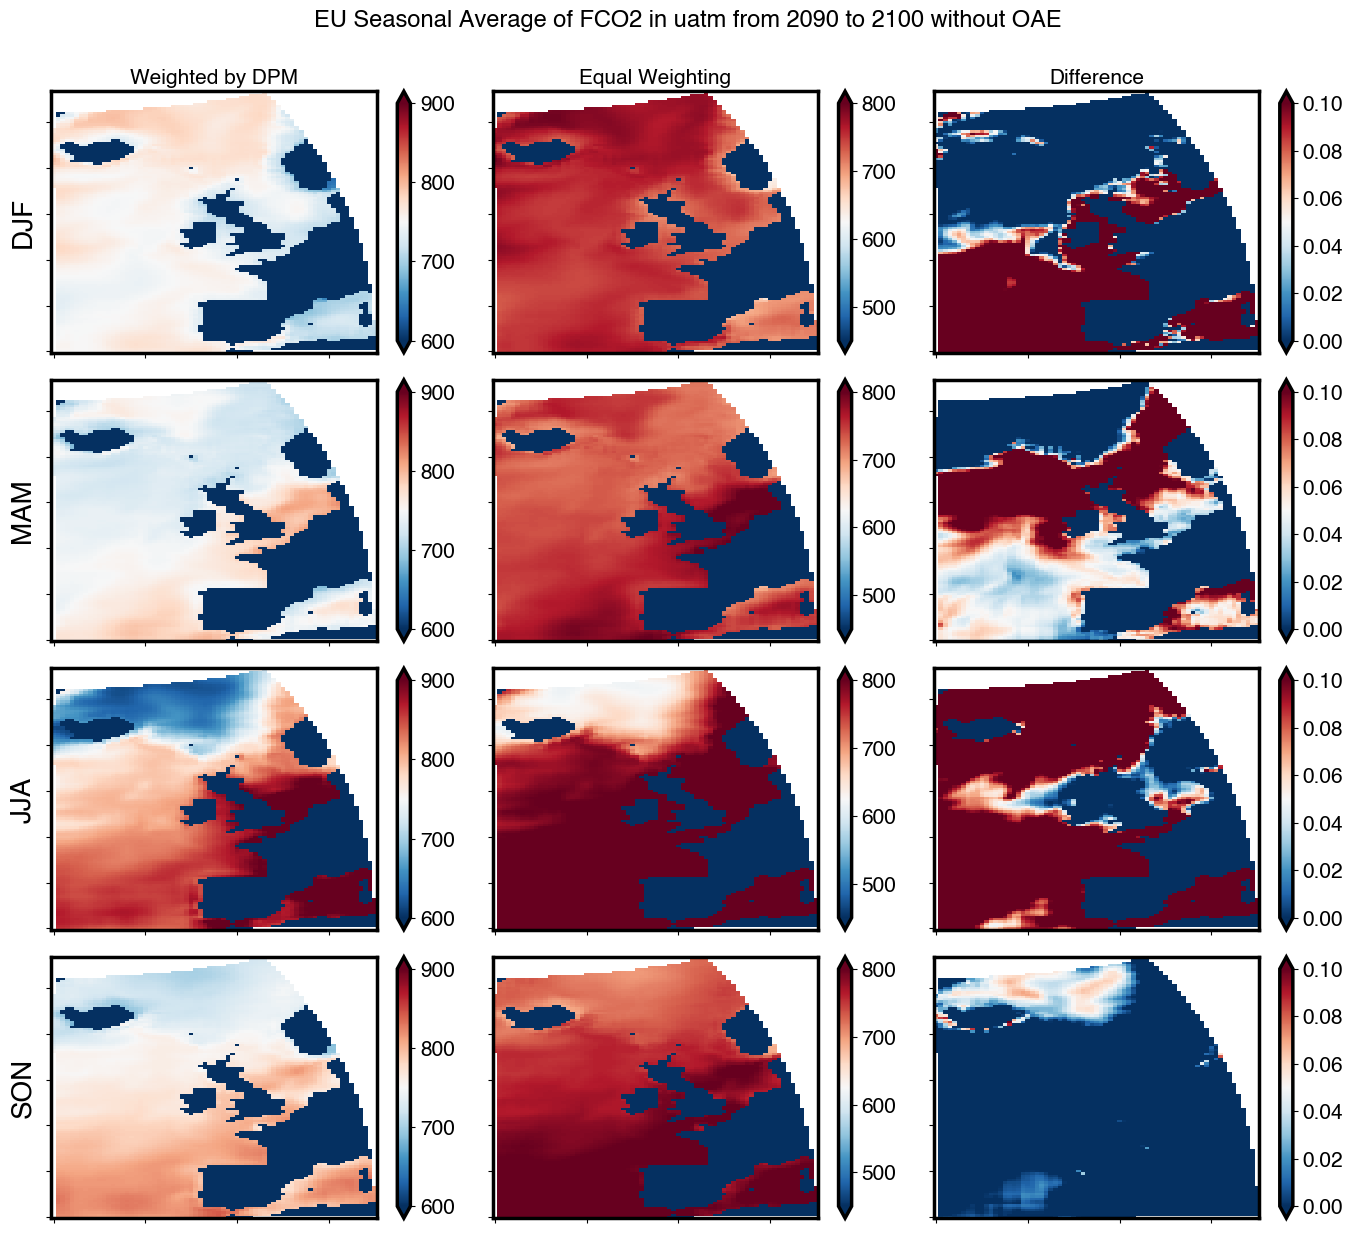

In [39]:
notnull = pd.notnull(ds_unweighted_baseline["fco2"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=600,
        vmax=900,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=450,
        vmax=800,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=0,
        vmax=0.1,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of FCO2 in uatm from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

In [40]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [41]:
weights_oae = weights_oae.to_dataset()

In [42]:
ds_weighted_oae = (sliced_frame_oae.fco2 * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='fco2')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

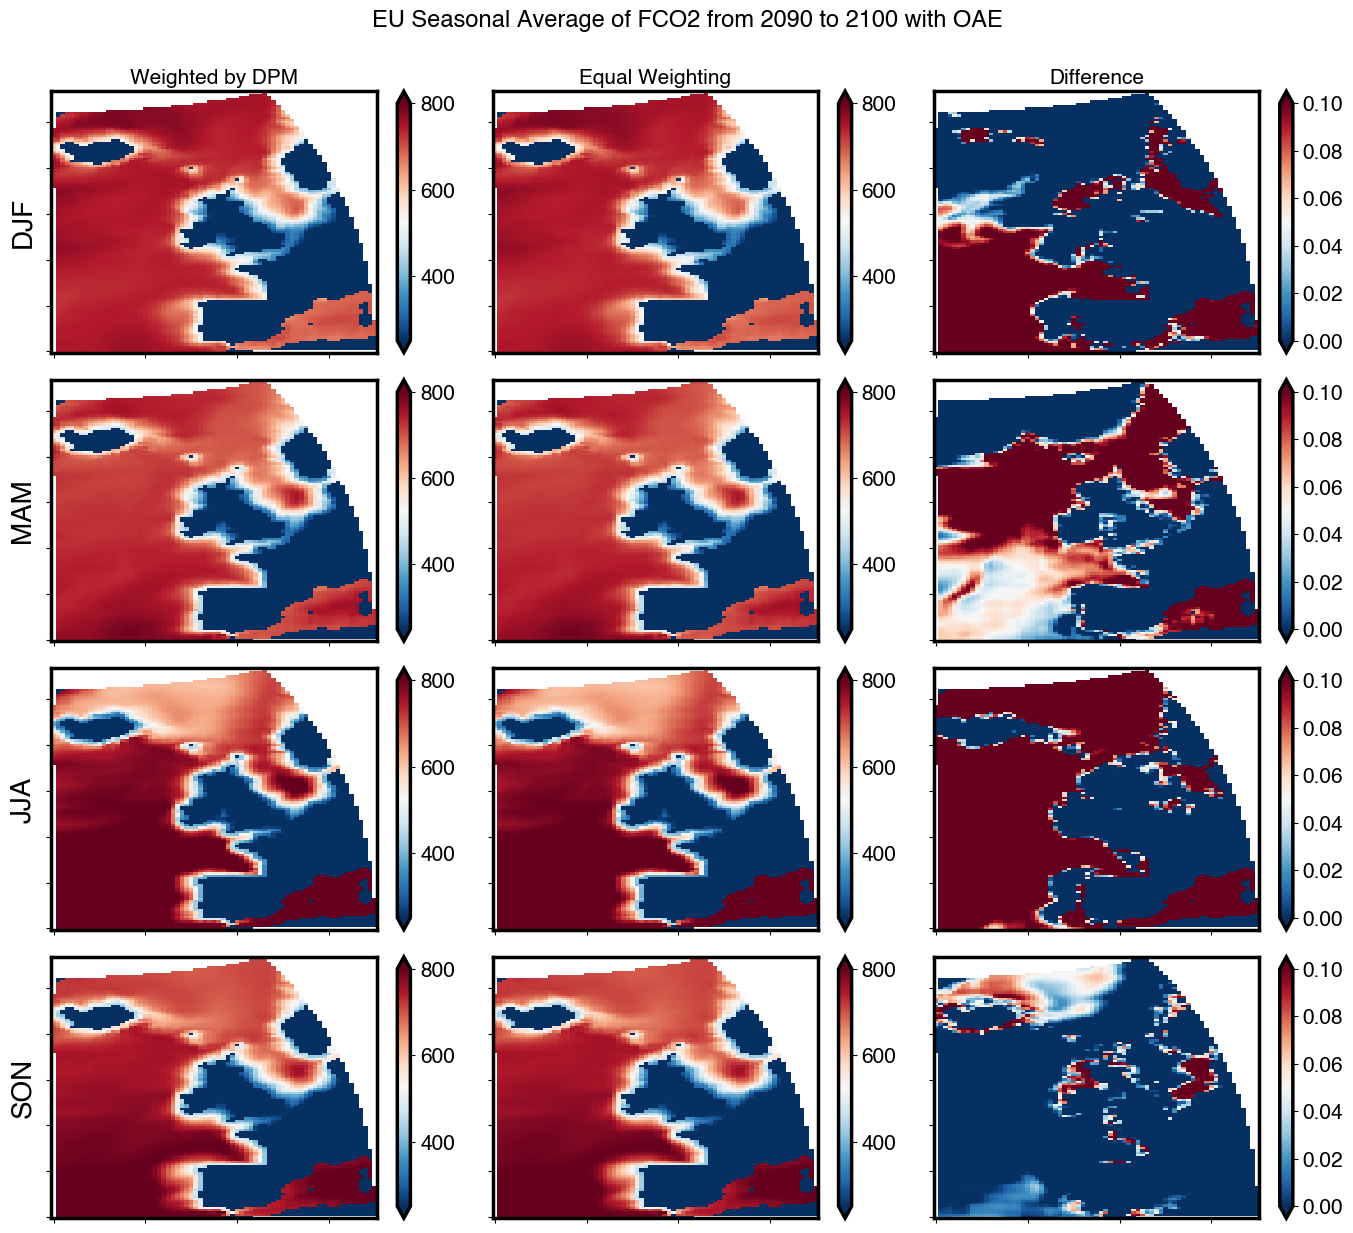

In [43]:
notnull = pd.notnull(ds_unweighted_oae["fco2"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=250,
        vmax=800,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=250,
        vmax=800,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["fco2"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=0,
        vmax=0.1,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of FCO2 from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### Unweighted EU Seasonal Average of FCO2 from 2090 to 2100 with and without OAE

In [44]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

fco2_baseline_month = sliced_data_baseline["fco2"].sel(time_counter=slice(start_date_month, end_date_month))

In [45]:
fco2_month_summary_baseline = fco2_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_month_mean_all_years_baseline = fco2_baseline_month.resample(time_counter='M', keep_attrs=True).mean()
fco2_monthly_mean_baseline = fco2_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning:

Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.



In [46]:
fco2_oae_month = sliced_data_oae["fco2"].sel(time_counter=slice(start_date_month, end_date_month))

In [47]:
fco2_month_summary_oae = fco2_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_month_mean_all_years_oae = fco2_oae_month.resample(time_counter='M', keep_attrs=True).mean()
fco2_monthly_mean_oae = fco2_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning:

Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.



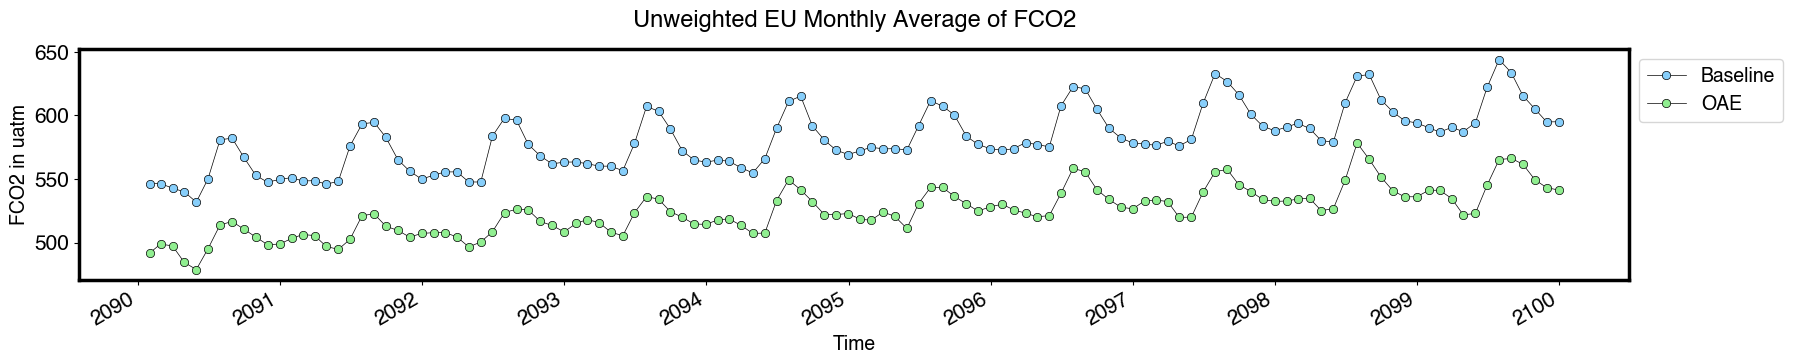

In [48]:
f, ax = plt.subplots(figsize=(20, 3))

fco2_monthly_mean_baseline.plot(marker="o", markersize=6, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_monthly_mean_oae.plot(marker="o", markersize=6, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of FCO2 from 2090 to 2100 without OAE

In [49]:
fco2_baseline_monthly = fco2_monthly_mean_baseline.to_dataframe('fco2')
fco2_baseline_monthly['Month'] = pd.DatetimeIndex(fco2_baseline_monthly.index).month

In [50]:
conditions = [
    (fco2_baseline_monthly['Month'] == 1),
    (fco2_baseline_monthly['Month'] == 2),
    (fco2_baseline_monthly['Month'] == 3),
    (fco2_baseline_monthly['Month'] == 4),
    (fco2_baseline_monthly['Month'] == 5),
    (fco2_baseline_monthly['Month'] == 6),
    (fco2_baseline_monthly['Month'] == 7),
    (fco2_baseline_monthly['Month'] == 8),
    (fco2_baseline_monthly['Month'] == 9),
    (fco2_baseline_monthly['Month'] == 10),
    (fco2_baseline_monthly['Month'] == 11),
    (fco2_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_baseline_monthly['Month'] = np.select(conditions, values)

In [51]:
colors = dict(zip(fco2_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

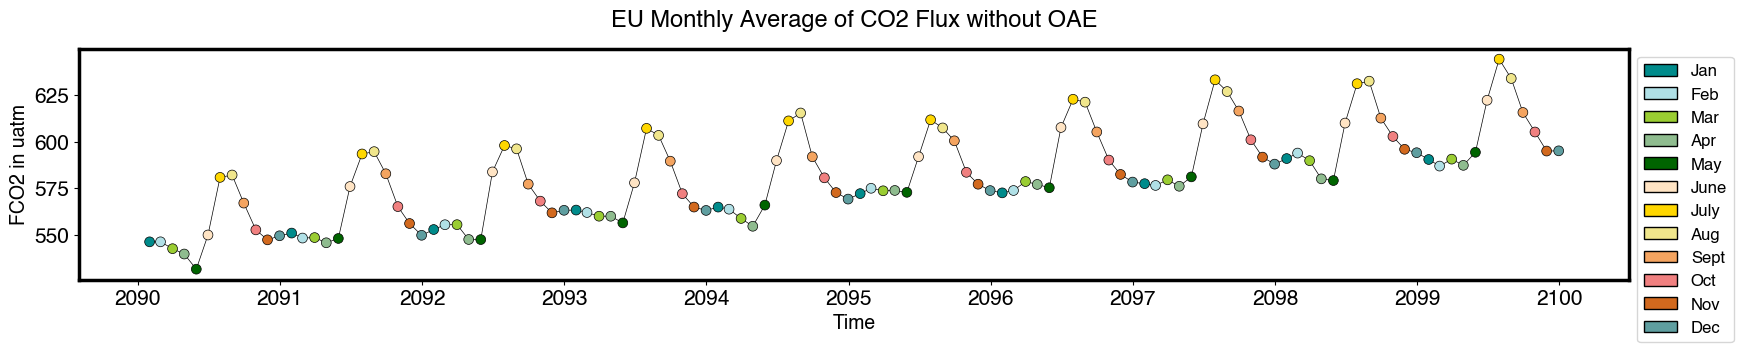

In [52]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, color=fco2_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=50)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("EU Monthly Average of CO2 Flux without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of FCO2 from 2090 to 2100 with OAE

In [53]:
fco2_oae_monthly = fco2_monthly_mean_oae.to_dataframe('fco2')
fco2_oae_monthly['Month'] = pd.DatetimeIndex(fco2_oae_monthly.index).month

In [54]:
conditions = [
    (fco2_oae_monthly['Month'] == 1),
    (fco2_oae_monthly['Month'] == 2),
    (fco2_oae_monthly['Month'] == 3),
    (fco2_oae_monthly['Month'] == 4),
    (fco2_oae_monthly['Month'] == 5),
    (fco2_oae_monthly['Month'] == 6),
    (fco2_oae_monthly['Month'] == 7),
    (fco2_oae_monthly['Month'] == 8),
    (fco2_oae_monthly['Month'] == 9),
    (fco2_oae_monthly['Month'] == 10),
    (fco2_oae_monthly['Month'] == 11),
    (fco2_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_oae_monthly['Month'] = np.select(conditions, values)

In [55]:
colors = dict(zip(fco2_oae_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

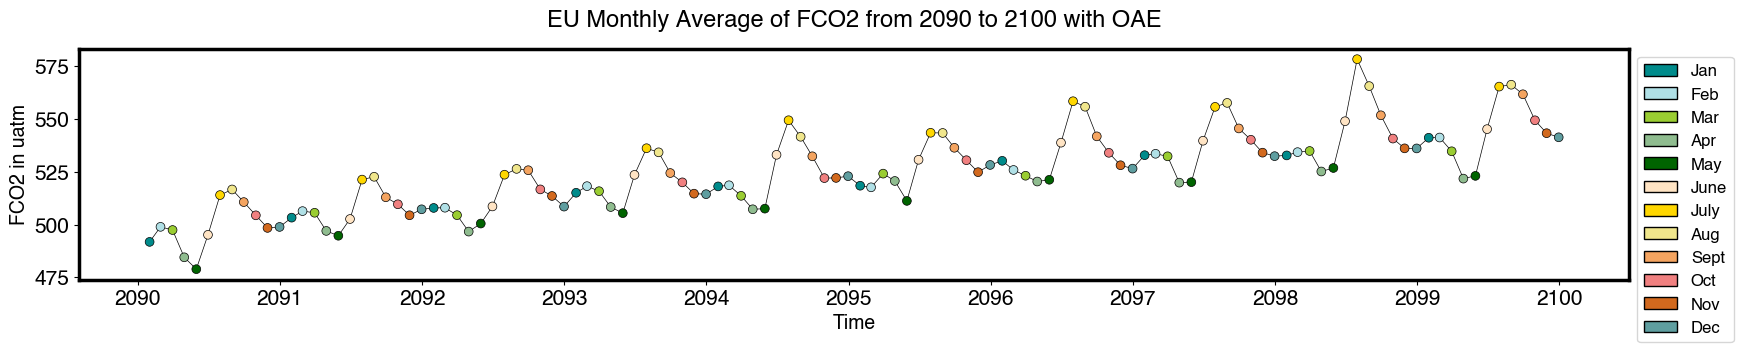

In [56]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_oae_monthly.index, fco2_oae_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_oae_monthly.index, fco2_oae_monthly.fco2, color=fco2_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("EU Monthly Average of FCO2 from 2090 to 2100 with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of FCO2 from 2090 to 2100 with and without OAE

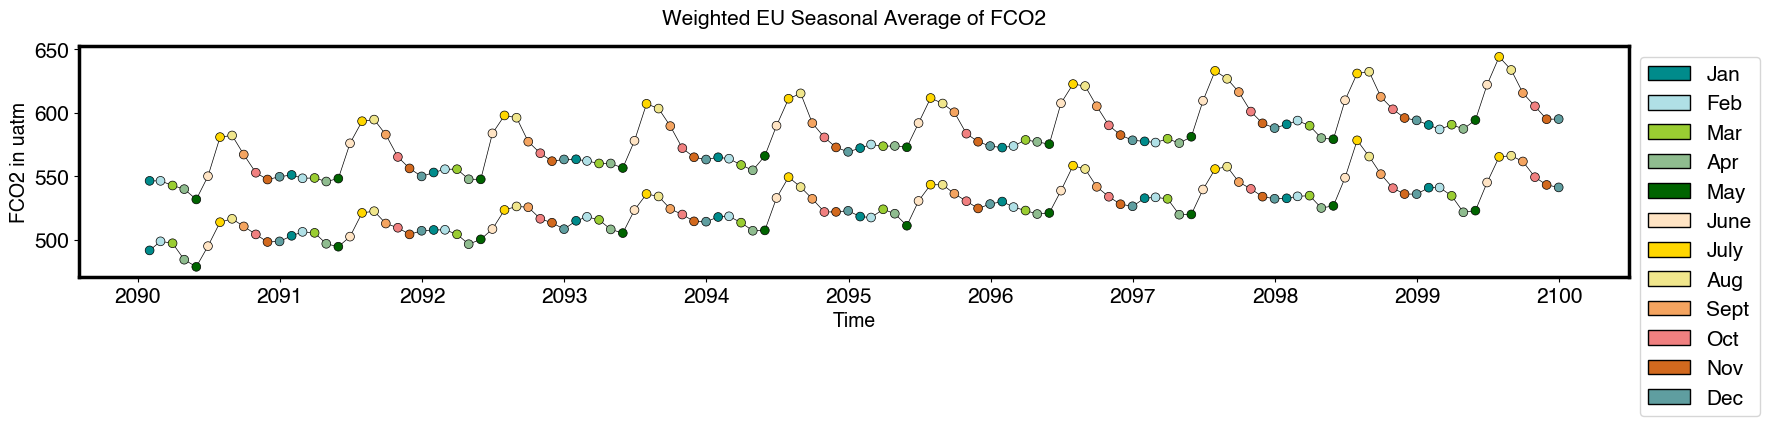

In [57]:
colors = dict(zip(fco2_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, color=fco2_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(fco2_oae_monthly.index, fco2_oae_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_oae_monthly.index, fco2_oae_monthly.fco2, color=fco2_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2", fontsize=15, y=1.06)

pass

### FCO2 Annual Amplitude without OAE

In [58]:
sliced_data_baseline_minmax = sliced_data_baseline_plot.to_dataframe()
sliced_data_baseline_minmax = sliced_data_baseline_minmax.reset_index()

In [59]:
year_max_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['fco2'].idxmax().values]

In [60]:
year_min_baseline = sliced_data_baseline_minmax.loc[sliced_data_baseline_minmax.groupby(sliced_data_baseline_minmax['time_counter'].dt.strftime('%Y'))['fco2'].idxmin().values]

In [61]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [62]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [63]:
fco2_amplitude_baseline = year_max_baseline['fco2'] - year_min_baseline['fco2']

In [64]:
fco2_amplitude_baseline = fco2_amplitude_baseline.to_xarray()

In [65]:
fco2_amplitude_baseline = fco2_amplitude_baseline.to_dataset()

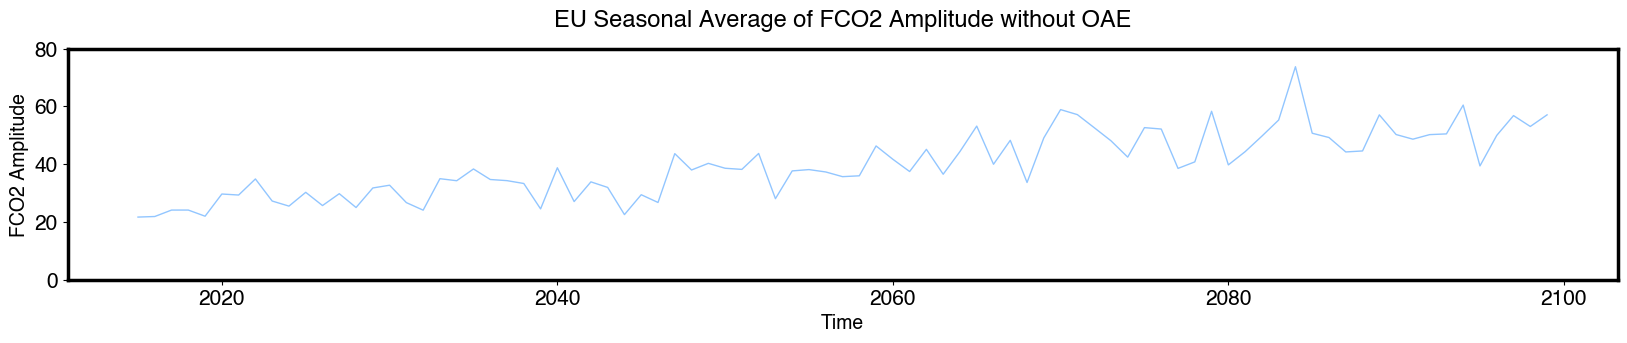

In [66]:
plt.figure(figsize=(20, 3))
plt.plot(fco2_amplitude_baseline.year, fco2_amplitude_baseline.fco2, linewidth=1)
plt.ylim(0, 80)
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 Amplitude", fontsize=14)
plt.title('EU Annual Average of FCO2 without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### FCO2 Annual Amplitude with OAE

In [67]:
sliced_data_oae_minmax = sliced_data_oae_plot.to_dataframe()
sliced_data_oae_minmax = sliced_data_oae_minmax.reset_index()

In [68]:
year_max_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['fco2'].idxmax().values]

In [69]:
year_min_oae = sliced_data_oae_minmax.loc[sliced_data_oae_minmax.groupby(sliced_data_oae_minmax['time_counter'].dt.strftime('%Y'))['fco2'].idxmin().values]

In [70]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [71]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [72]:
fco2_amplitude_oae = year_max_oae['fco2'] - year_min_oae['fco2']

In [73]:
fco2_amplitude_oae = fco2_amplitude_oae.to_xarray()

In [74]:
fco2_amplitude_oae = fco2_amplitude_oae.to_dataset()

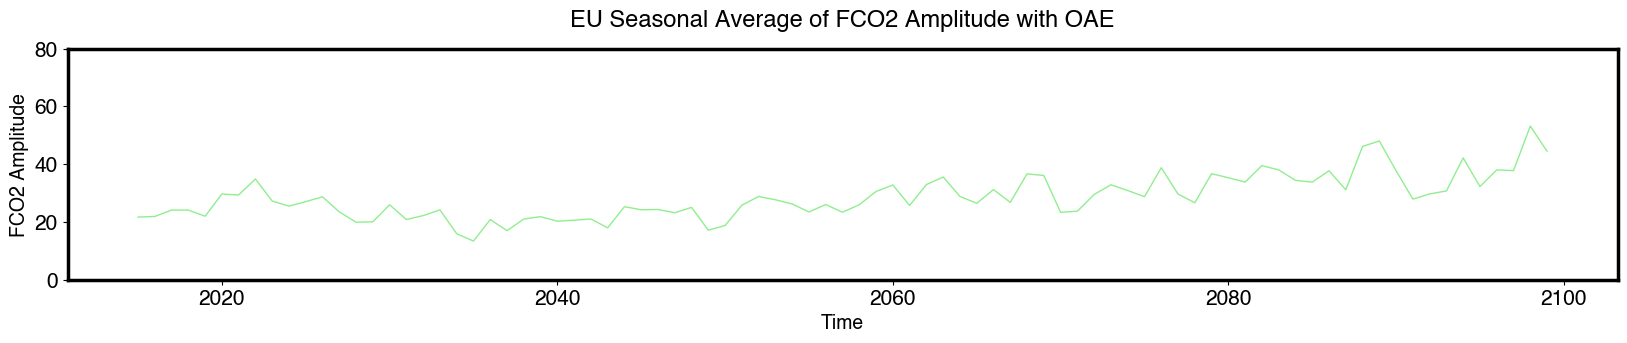

In [75]:
plt.figure(figsize=(20, 3))
plt.plot(fco2_amplitude_oae.year, fco2_amplitude_oae.fco2, linewidth=1, color='lightgreen')
plt.ylim(0, 80)
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 Amplitude", fontsize=14)
plt.title('EU Annual Average of FCO2 with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### FCO2 Annual Amplitude with and without OAE

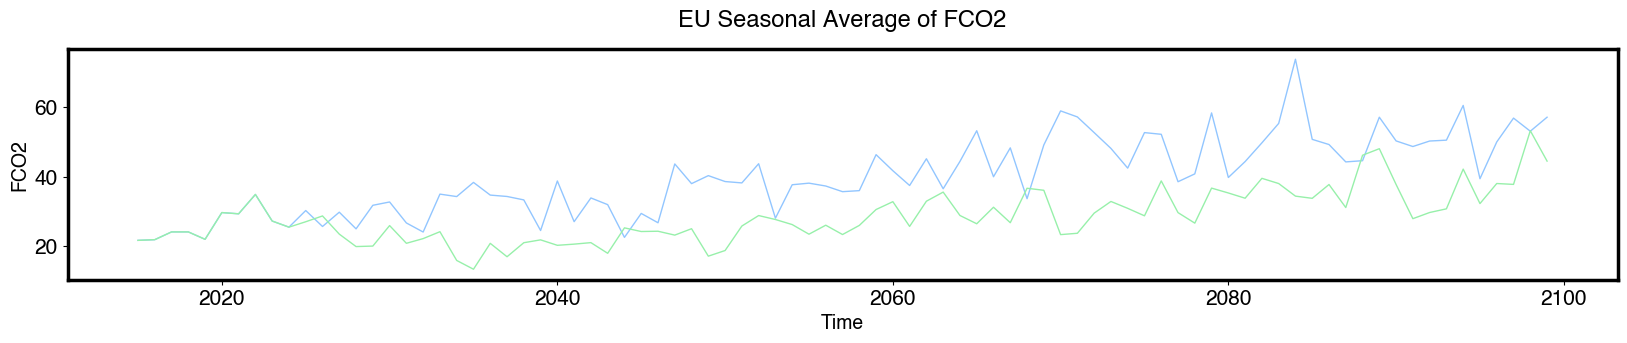

In [82]:
plt.figure(figsize=(20, 3))
plt.plot(fco2_amplitude_baseline.year, fco2_amplitude_baseline.fco2, linewidth=1, label = 'Baseline')
plt.plot(fco2_amplitude_oae.year, fco2_amplitude_oae.fco2, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 Amplitude", fontsize=14)
plt.title('EU Annual Average of FCO2', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### % Amplitude Change Over Time with and without OAE

In [76]:
fco2_amplitude_baseline_pct = fco2_amplitude_baseline.to_dataframe()
fco2_amplitude_oae_pct = fco2_amplitude_oae.to_dataframe()

In [77]:
fco2_amplitude_baseline_pct = fco2_amplitude_baseline_pct.pct_change()
fco2_amplitude_oae_pct = fco2_amplitude_oae_pct.pct_change()

In [78]:
fco2_amplitude_baseline_pct = fco2_amplitude_baseline_pct.to_xarray()
fco2_amplitude_oae_pct = fco2_amplitude_oae_pct.to_xarray()

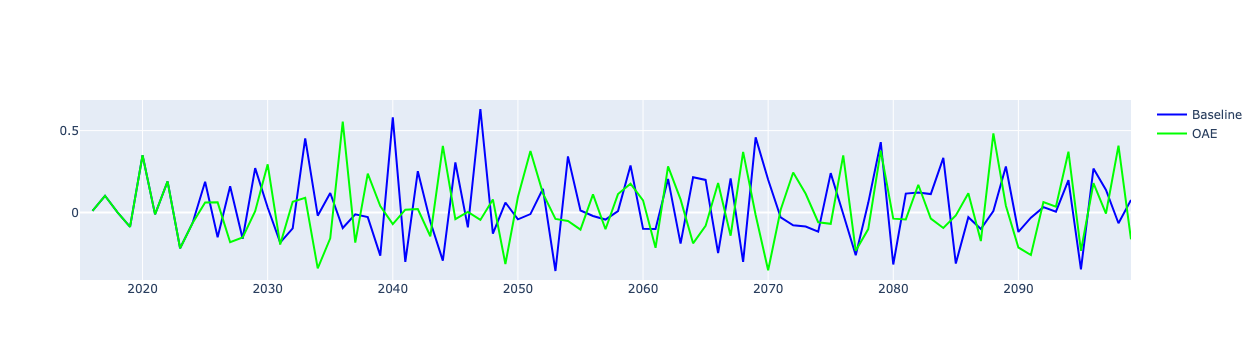

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fco2_amplitude_baseline_pct.year, y=fco2_amplitude_baseline_pct['fco2'],
                    mode='lines', line_color='#0000FF',
                    name='Baseline'))
fig.add_trace(go.Scatter(x=fco2_amplitude_oae_pct.year, y=fco2_amplitude_oae_pct['fco2'],
                    mode='lines', line_color='#00FF00',
                    name='OAE'))
fig.show()